In [1]:
import warnings
warnings.filterwarnings('ignore')

import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# %pip install ipdb

In [3]:
# %pip install scikit-image

In [4]:
# %pip install visdom

In [5]:
# %pip install torchnet

In [6]:
# %pip install ipywidgets

In [7]:
%load_ext autoreload
%autoreload 2
import os
import torch
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at

%matplotlib inline

In [8]:
img = read_image('misc/demo3.jpg')
img = torch.from_numpy(img)[None]

In [9]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

Setting up a new session...
Traceback (most recent call last):
  File "c:\Users\SVhd08\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "c:\Users\SVhd08\anaconda3\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "c:\Users\SVhd08\anaconda3\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\SVhd08\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "c:\Users\SVhd08\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 398, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "c:\Users\SVhd08\anaconda3\lib\site-packages\urllib3\

Exception in user code:
------------------------------------------------------------


# 1. model trained with torchvision pretrained model

<AxesSubplot:>

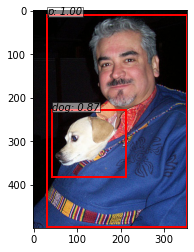

In [10]:
# trainer.load('checkpoints/fasterrcnn_07040158_0.5055475495108415')
# trainer.load('checkpoints/fasterrcnn_07040605_0.4052366113302585')
# trainer.load('checkpoints/fasterrcnn_07040928_0.6966079102692732')

# trainer.load('fasterrcnn_torchvision_pretrain.pth.701052458187')



# Models have to be selected
trainer = trainer.load('checkpoints/20220707_fasterrcnn_11_epoch_model.pth')

# opt.caffe_pretrain = False # this model was trained from torchvision-pretrained model


_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img, visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

# # Finding threshold = 0.7 score